# **1. Overview**
---

## Executive Summary
- Dataset size: 364 rows, 13 columns
- Numeric columns: 11, Categorical: 2
- Missing values: None
- Outliers: Present in Response Time and Latency

## **Library imports**

In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math

## **File imports**

In [3]:
# folder for txt files
folder = 'qws1_dataset/*.txt'

# list of files
files = glob.glob(folder)

# number of files
count = 1
for file in files:
    print(f'File number {count} - {file}')
    count += 1

File number 1 - qws1_dataset\qws1.txt


### File listing

- List the total number of files, convert them into Dataframes and append them in a python list;
- Verify the first few rows and data types

In [4]:
# Check columns and dtypes
df_list = []

for file in files:
    try:
        df_list.append(pd.read_csv(file, sep=','))
    except Exception as e:
        print(f"Skipping {file}: {e}")

if df_list:
    df = pd.concat(df_list, ignore_index=True)
    print(df.shape)
else:
    print("No valid files")

df.head()

(364, 13)


,Response Time,Availability,Throughput,Successability,Reliability,Compliance,Best Practices,Latency,Documentation,WsRF: Web Service Relevancy Function (%),Class: levels representing service offering qualities (1 through 4),Service Name,WSDL Address
0,45.00,83,27.2,50,97.4,89,91,43.00,58,100,1,DictionaryService,http://www.mindswap.org/2002/services/Dictiona...
1,71.75,100,14.6,88,85.5,78,80,64.42,86,93,1,MyService,http://mydispatch.com/myservice.asmx?wsdl
2,117.00,100,23.4,83,88.0,100,87,111.00,59,90,1,aba,http://www.quentinsagerconsulting.com/wsdl/aba...
3,70.00,100,5.4,83,79.3,100,75,63.00,91,90,1,AlexaWebSearch,http://wsearch.amazonaws.com/doc/2007-03-15/We...
4,105.20,100,18.2,80,92.2,78,84,104.60,91,90,1,ErrorMailer,http://www.errormail.net/EM/ErrorMailer.asmx?wsdl


### Split data into numerical or categorical

In [5]:
df_numerical = df.select_dtypes(include='number')
df_categorical = df.select_dtypes(include='object')

---
# **2. Graphical Exploration**
---

## **Univariate Analysis (1 variable)**

In [6]:
# Check for skewness or log-transform suggestion
print("Skewness of numeric columns:")
print(df_numerical.skew())

Skewness of numeric columns:
Response Time                                                          7.928711
Availability                                                          -1.478005
Throughput                                                             1.241758
Successability                                                        -0.741783
Reliability                                                           -0.645650
Compliance                                                             0.634805
Best Practices                                                        -0.966659
Latency                                                                8.063425
Documentation                                                          0.113207
WsRF: Web Service Relevancy Function (%)                              -0.307966
Class: levels representing service offering qualities (1 through 4)   -0.273701
dtype: float64


 - Response Time and Latency are skewed (distribution of data is not symmetric)

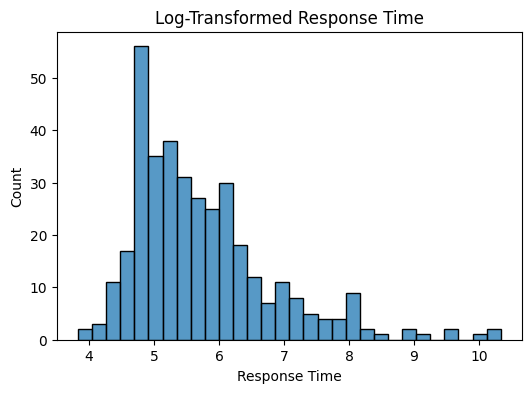

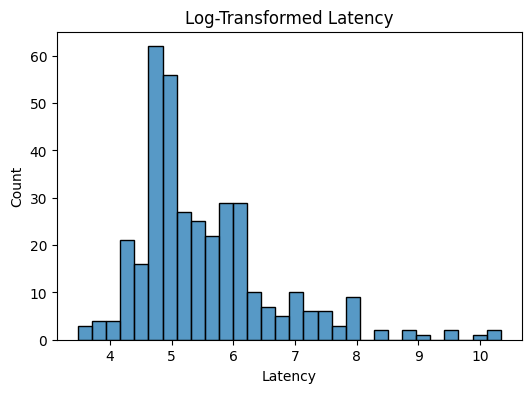

In [7]:
skewed_cols = ['Response Time', 'Latency']
for col in skewed_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(np.log1p(df[col]), bins=30)
    plt.title(f'Log-Transformed {col}')
    plt.show()

### **Data Distribuition**

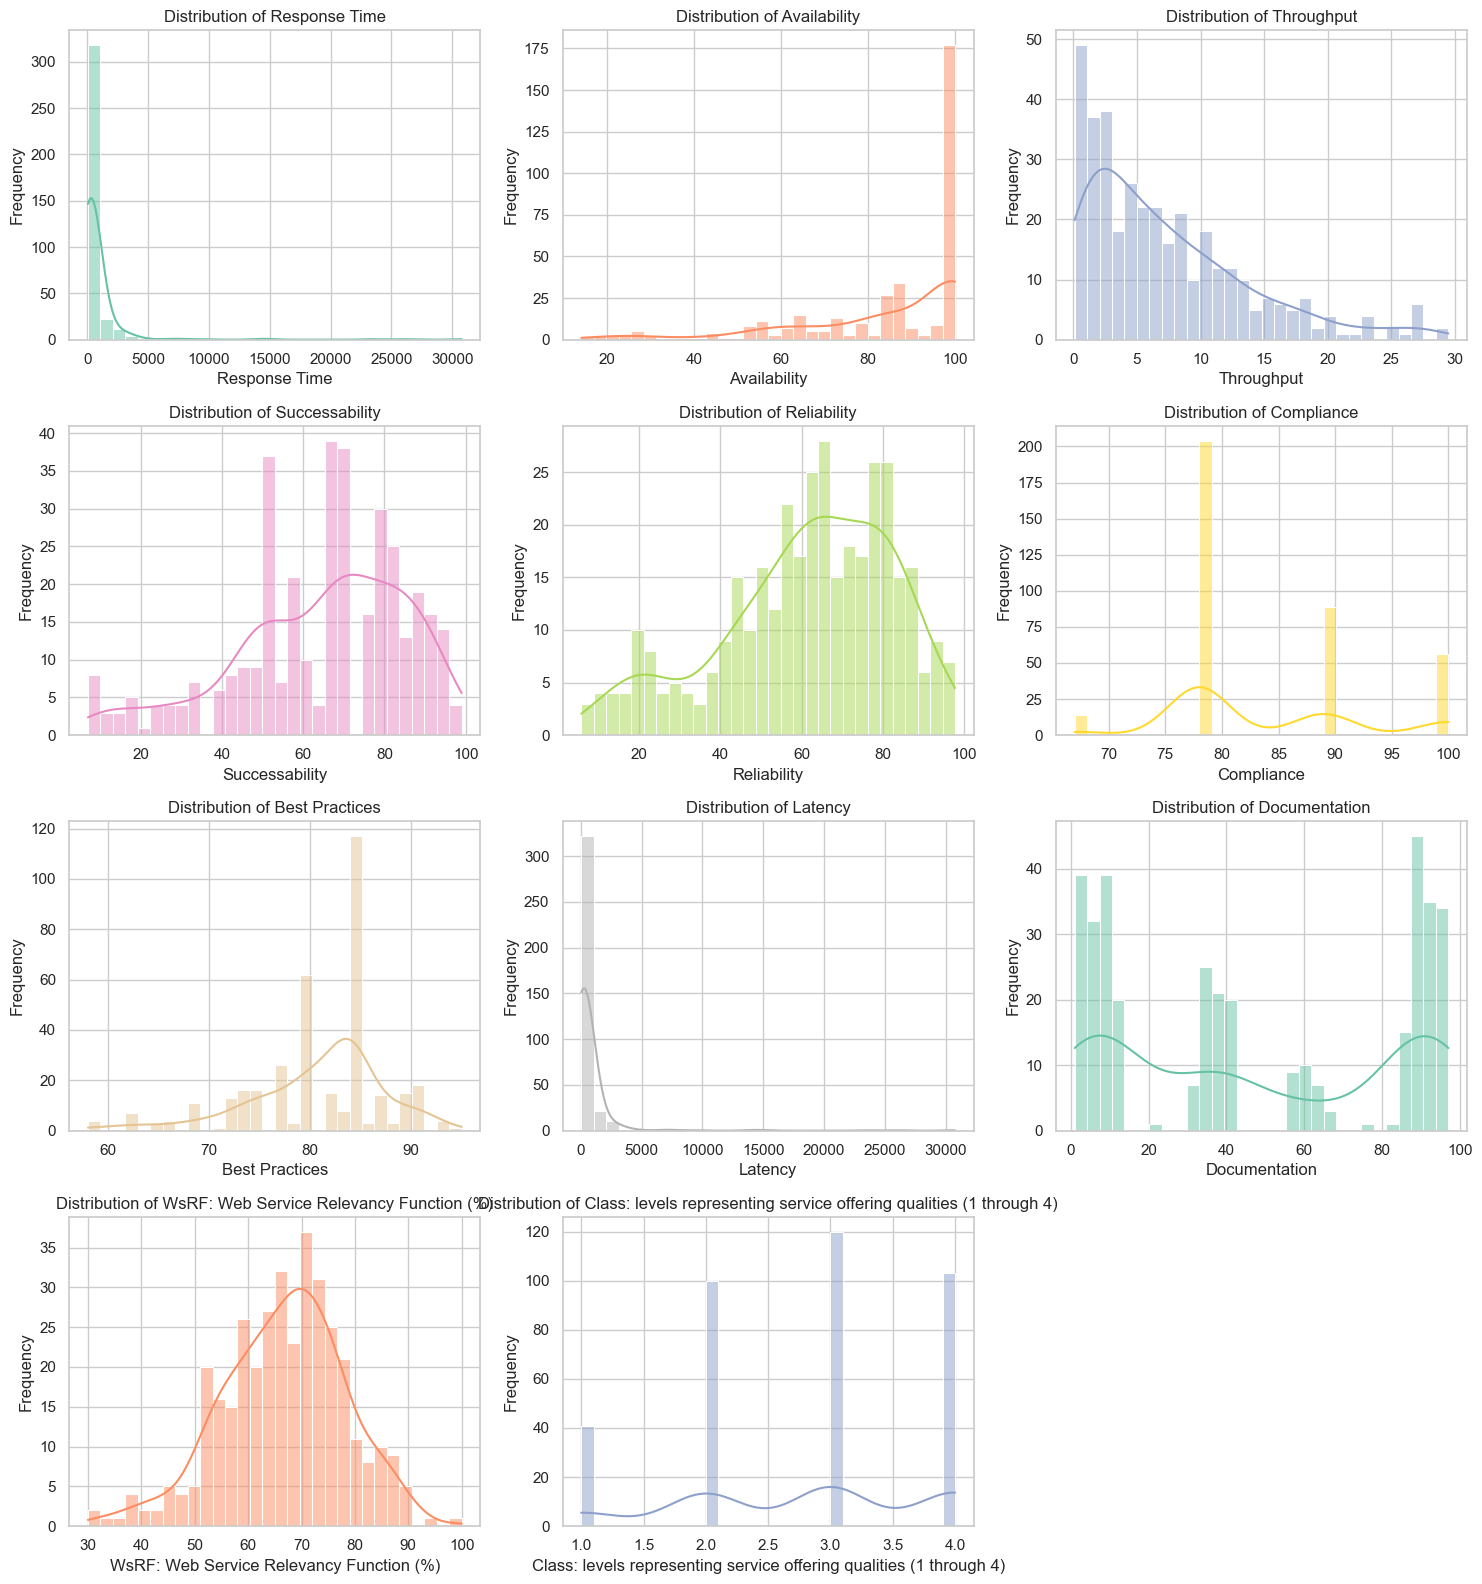

In [8]:
sns.set_theme(style="whitegrid")

# Calculate rows and columns dynamically
num_cols = len(df_numerical.columns)
rows = math.ceil(num_cols / 3)  # 3 columns per row
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, rows * 4))
axes = axes.flatten()

colors = sns.color_palette("Set2", num_cols)

for i, col in enumerate(df_numerical.columns):
    sns.histplot(df_numerical[col], bins=30, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove unused axes
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Key Findings:**

**1 Response Time e Latency:**
- Extreme right skew (long tail)
- Values concentrated near 0, but a few very large outliers exist

Implication - There are services with very high delays—potential performance bottlenecks

**2 Avaiability:**
- Almost all values are near 100%, with very few lower values

Implication - Most services are highly available, so this feature has low variance and may have limited predictive power.

**3 Throughput:**
- Right-skewed distribution, most values between 0–10

Implication - Throughput varies but is generally low; could indicate resource constraints

**4 Successability, Reliability, Best Practices, WsRF:**
- These look approximately normal or slightly skewed, centered around 50–80

Implication - These features have good spread and may be useful for modeling

**5 Compliance & Documentation:**
- Compliance has few distinct peaks
- Documentation shows clusters, possibly indicating different service tiers

Implication - These might represent discrete quality levels rather than continuous metrics

**6 Class (Service Quality Levels):**
- Only 4 distinct values (1–4)

Implication - This is your target or grouping variable; treat as categorical

C:\Users\riabreu\AppData\Local\Temp\ipykernel_15924\436082329.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\riabreu\AppData\Local\Temp\ipykernel_15924\436082329.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Platinum', 'Gold', 'Silver', 'Bronze'])


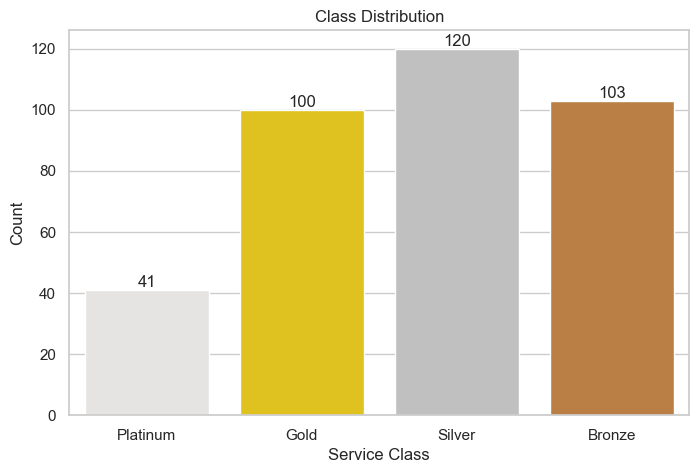

In [9]:
# Custom colors for classes
class_palette = {
    1: "#E5E4E2",
    2: "#FFD700",  
    3: "#C0C0C0",  
    4: "#CD7F32"   
}

plt.figure(figsize=(8, 5))
ax = sns.countplot(
    x='Class: levels representing service offering qualities (1 through 4)',
    data=df_numerical,
    order=[1, 2, 3, 4],
    palette=[class_palette[i] for i in [1, 2, 3, 4]]
)

# Add numbers on top of bars
for container in ax.containers:
    ax.bar_label(container)

# Custom X-axis labels
ax.set_xticklabels(['Platinum', 'Gold', 'Silver', 'Bronze'])

plt.title('Class Distribution')
plt.xlabel('Service Class')
plt.ylabel('Count')
plt.show()

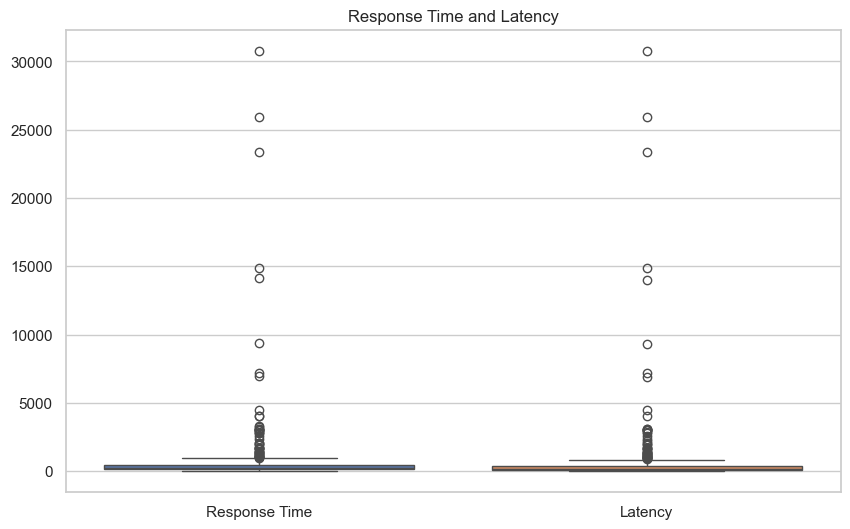

In [10]:
# Boxplots for Response Time and Latency
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numerical[['Response Time', 'Latency']])
plt.title('Response Time and Latency')
plt.show()

## **Bivariate Analysis (2 variables)**

In [11]:
df_num = df_numerical.copy()
df_num.rename(columns={"Class: levels representing service offering qualities (1 through 4)": 'Class qualities', 'WsRF: Web Service Relevancy Function (%)': 'WsRF (%)'}, inplace=True)

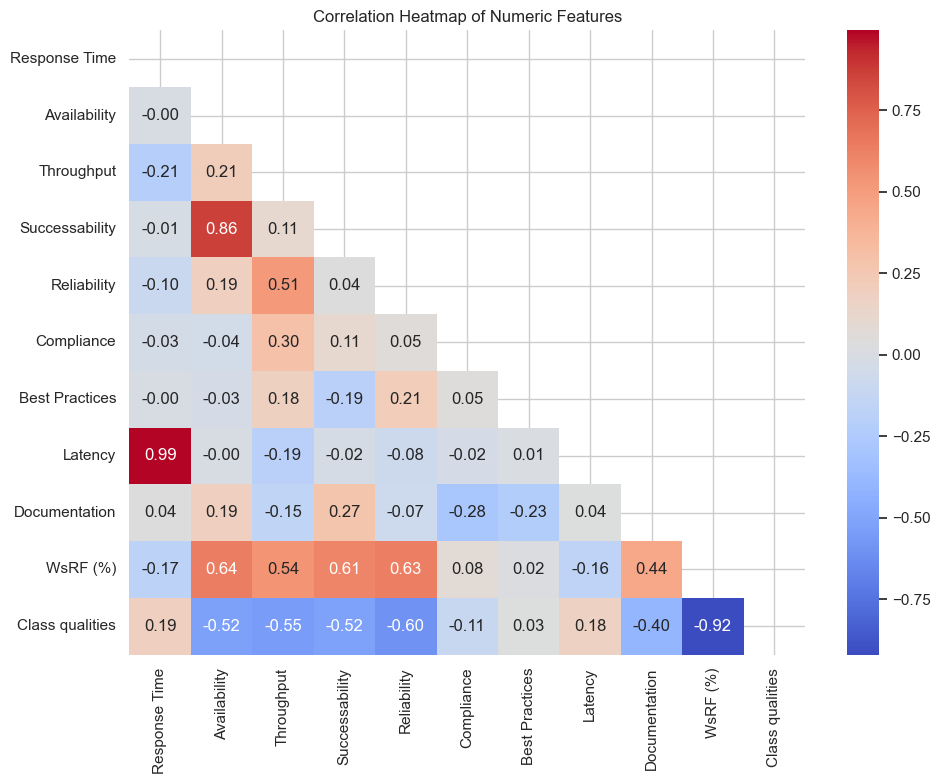

In [12]:
# Compute correlation matrix
corr_matrix = df_num.corr()

# Plot heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

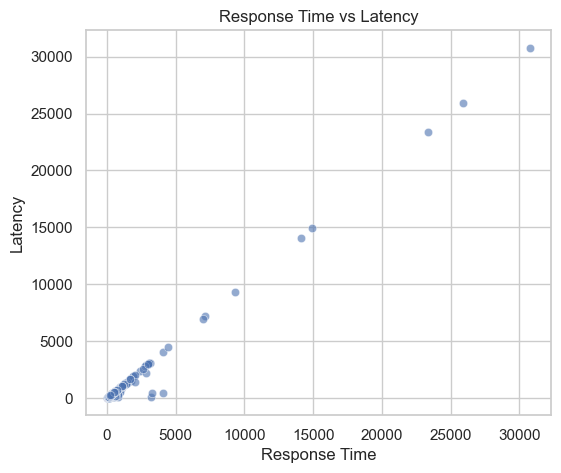

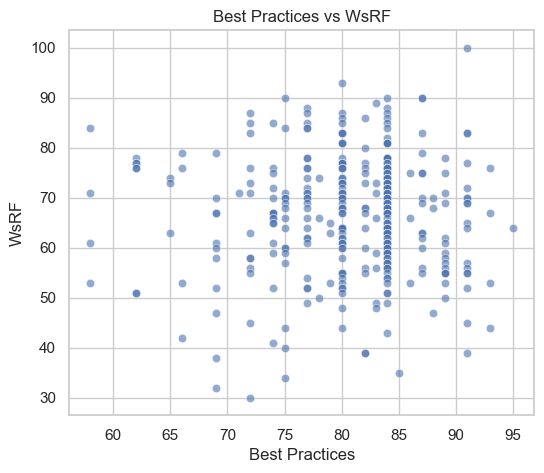

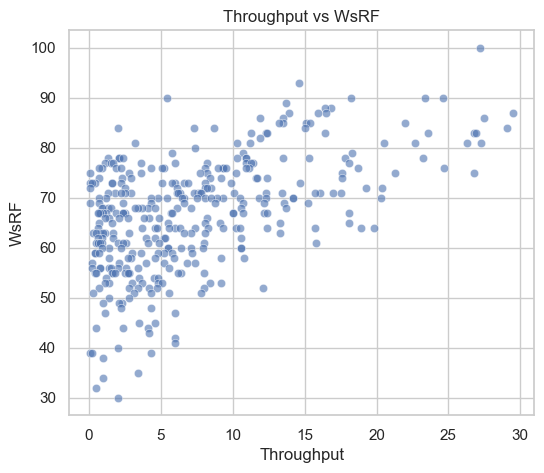

In [17]:
# Response Time vs Latency
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Response Time', y='Latency', data=df_num, alpha=0.6)
plt.title('Response Time vs Latency')
plt.xlabel('Response Time')
plt.ylabel('Latency')
plt.show()

# Throughput vs WsRF
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Best Practices', y='WsRF (%)', data=df_num, alpha=0.6)
plt.title('Best Practices vs WsRF')
plt.xlabel('Best Practices')
plt.ylabel('WsRF')
plt.show()

# Throughput vs WsRF
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Throughput', y='WsRF (%)', data=df_num, alpha=0.6)
plt.title('Throughput vs WsRF')
plt.xlabel('Throughput')
plt.ylabel('WsRF')
plt.show()

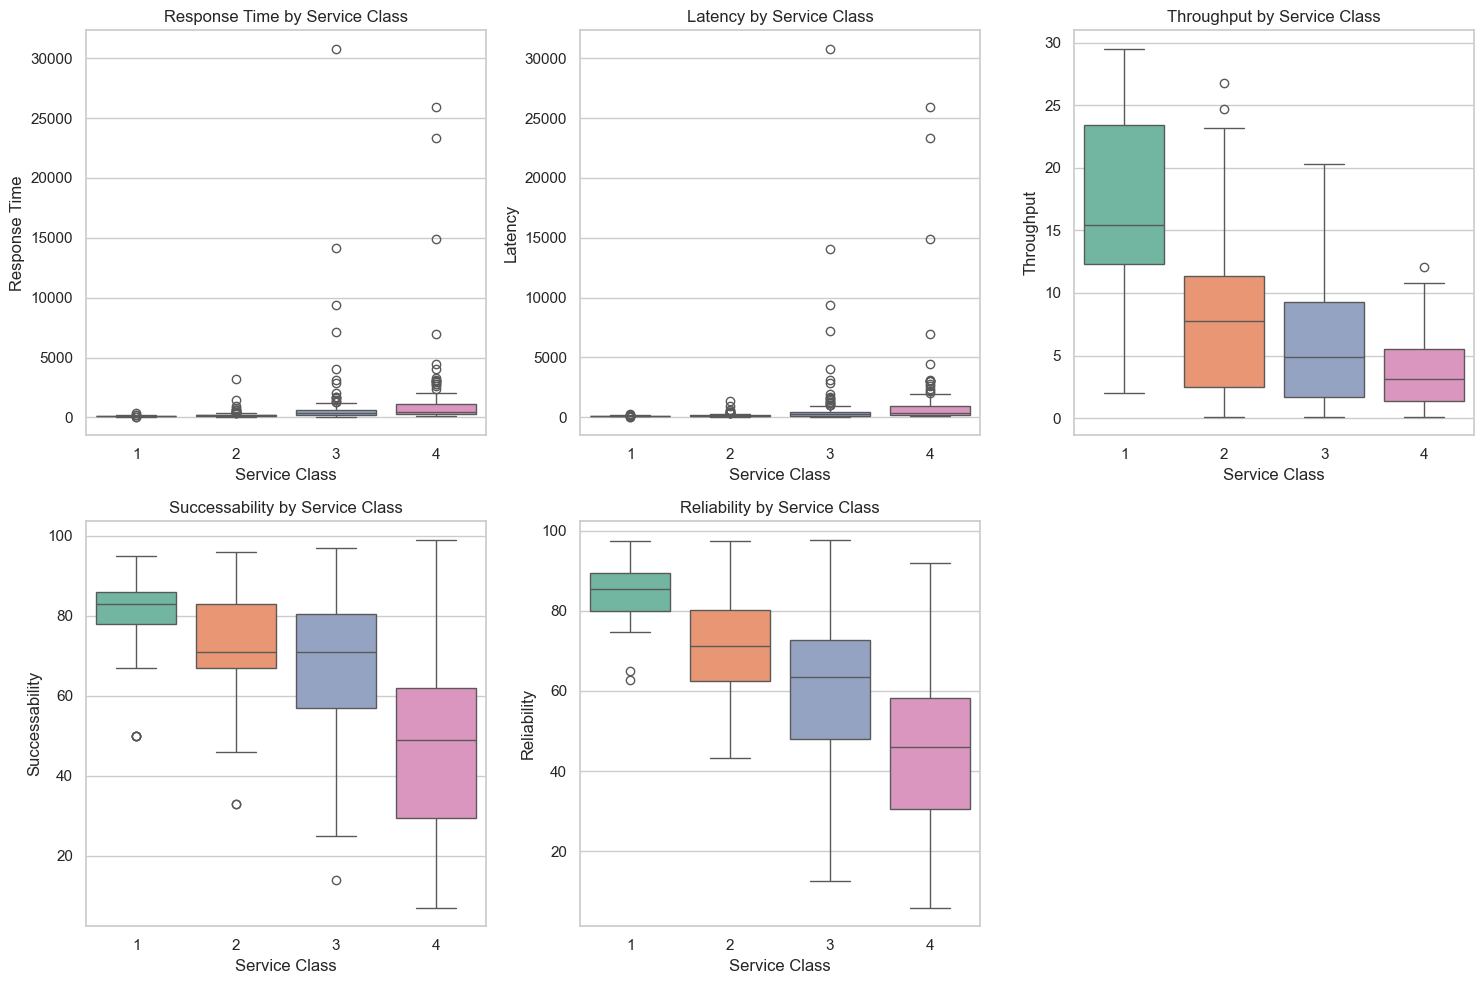

In [14]:
qos_metrics = ['Response Time', 'Latency', 'Throughput', 'Successability', 'Reliability']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(qos_metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Class qualities', y=metric, hue='Class qualities', data=df_num, palette='Set2', legend=False)
    plt.title(f'{metric} by Service Class')
    plt.xlabel('Service Class')
    plt.ylabel(metric)
plt.tight_layout()
plt.show()

## **Multivariate Analysis**

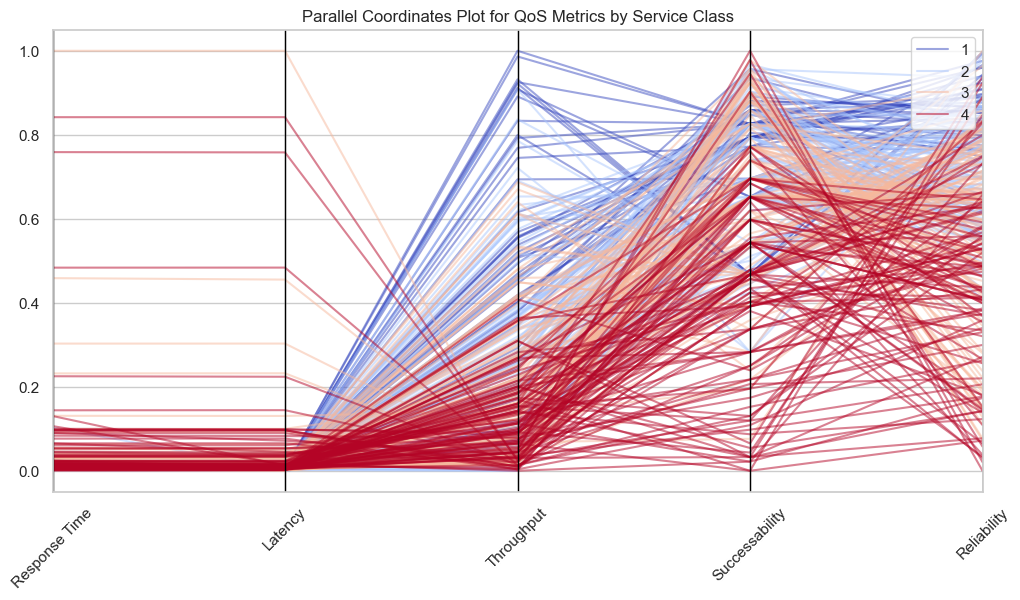

In [15]:
# Rename column
df.rename(columns={"Class: levels representing service offering qualities (1 through 4)": "Class"}, inplace=True)

# Select and normalize
qos_cols = ['Response Time', 'Latency', 'Throughput', 'Successability', 'Reliability']
subset = df[qos_cols + ['Class']].copy()
scaler = MinMaxScaler()
subset[qos_cols] = scaler.fit_transform(subset[qos_cols])

# Plot
plt.figure(figsize=(12, 6))
parallel_coordinates(subset, 'Class', colormap='coolwarm', alpha=0.5)
plt.title('Parallel Coordinates Plot for QoS Metrics by Service Class')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


---
# **3 Observations**
---

Univariate Analysis:

- Availability is concentrated near 100%, suggesting most services are highly available.
- Successability, Reliability, and WsRF are fairly normal, centered around 50–80.

Bivariate Analysis:
- Platinum services (Class 1) generally have lower Response Time and Latency compared to Bronze.
- Throughput tends to decrease as class level increases (Platinum → Bronze).
- Reliability and Successability are higher for Platinum and Gold.
- Response Time and Latency show strong positive correlation (services with high response time also have high latency).
- Best Practices vs WsRF shows weak correlation, suggesting WsRF may not strongly depend on Best Practices.
- Response Time and Latency have the highest correlation among numeric features.
- Availability and Documentation have low correlation with other metrics, indicating limited predictive power.

Multivariate Analysis:
- Platinum services cluster with low Response Time and Latency, high Reliability and Successability.
- Bronze services show the opposite pattern: high delays and lower reliability.

**Columns that can be dropped - (Latency or Response Time, only one), Best Practices**